# Initial Streaming Analysis
   
---
   
This is initial analysis use basic datasets of `StreamingHistory_music_#.json` which is include in Spotify Account Data. According to Understanding your data page of Spotify, this dataset consists of recent annual music history that includes:

*  `endTime`    : Date and time of when the stream ended in Coordinated Universal Time format (UTC).
*  `artistName` : Name of "creator" for each stream (e.g. the artist name of a music track).
*  `trackName`  : Name of items listened to or watched (e.g. title of music track or name of video).
*  `msPlayed`   : How many mili-seconds the track was listened to.
   
---
  
This dataset can be used to:
*  Behavioural Pattern Analysis : Listening Trend
  
---
  

## Table of Contents

- [1. Load, parse, and merge data files](#load-parse-merge)
- [2. Exploratory Data Analysis](#eda)
    - [2.1. Dataset overview](#dataset-overview)
    - [2.2. Univariate analysis](#univariate)
        - [2.2.1. Data Prep](#uni-data-prep)
        - [2.2.2. Numerical Data](#uni-numerical)
        - [2.2.3. Categorical Data](#uni-categorical)
        - [2.2.4. Text Data Analysis](#uni-text)
    - [2.3. Bivariate analysis](#bivariate)
        - [2.3.1. Data Prep](#bi-prep)
    - [2.4 Multivariate analysis](#multivariate)
- [3. Key insights and research questions](#key-research)
    - [3.1. Key findings](#key-findings)
    - [3.2. Machine Learning research questions and justification](#ml-questions)
- [References](#references)


<a name="load-parse-merge"></a>
# 1. Load, parse, and merge data files

In [1]:
# pip install numpy pandas matplotlib seaborn

In [2]:
# Import Library
import os

## Universal Data Processing
import numpy as np
import pandas as pd

## Regular Expression for Text Data
import re

## JSON Files Manipulation
import json

In [3]:
# Get Current Directory Address
base_dir = os.getcwd()
dataset_dir = os.path.join(base_dir, "Dataset")

# List included datasets paths
paths = [
    os.path.join(dataset_dir, "StreamingHistory_music_0.json"),
    os.path.join(dataset_dir, "StreamingHistory_music_1.json"),
    os.path.join(dataset_dir, "StreamingHistory_music_2.json"),
    os.path.join(dataset_dir, "StreamingHistory_music_3.json"),
    os.path.join(dataset_dir, "StreamingHistory_music_4.json"),
]

# Load each datasets
all_data = []

for idx, path in enumerate(paths):              # use `for count, item in enumerate(items, start=1)` to customize the indexing
    print(f"Loading file {idx}: {path}")
    with open(path, "r", encoding="utf-8") as json_file:
        data_idx = json.load(json_file)
        all_data.append(data_idx)

print("Files loaded", len(all_data))


Loading file 0: c:\03. Other\Spotify_Unwrapped\Dataset\StreamingHistory_music_0.json
Loading file 1: c:\03. Other\Spotify_Unwrapped\Dataset\StreamingHistory_music_1.json
Loading file 2: c:\03. Other\Spotify_Unwrapped\Dataset\StreamingHistory_music_2.json
Loading file 3: c:\03. Other\Spotify_Unwrapped\Dataset\StreamingHistory_music_3.json
Loading file 4: c:\03. Other\Spotify_Unwrapped\Dataset\StreamingHistory_music_4.json
Files loaded 5


In [4]:
# Convert loaded data into suitable objects for ease of manipulation
flat_data = []

for file_data in all_data:
    flat_data.extend(file_data)

# Flatten the Table to make sure the dictionary or embedded arays data in the flat table
df_json = pd.json_normalize(flat_data)
df_json.head()

,endTime,artistName,trackName,msPlayed
0,2025-01-17 19:39,jisokuryClub,Then Tonight,35141
1,2025-01-18 22:02,Fujii Kaze,Matsuri,171093
2,2025-01-19 04:29,Sincere,rain,176817
3,2025-01-19 04:32,Sincere,bed,196449
4,2025-01-19 04:35,Sincere,Good Girl,202122


<a name="eda"></a>
# 2. Exploratory Data Analysis

The primary goal of Exploratory Data Analysis (EDA) is to gain an in-depth understanding of the dataset to inform subsequent decisions, such as data preprocessing, model design, or hypothesis generation

In [5]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns

*Missing Values*

In [6]:
print(f"Null values before cleaning:\n{df_json.isnull().sum()}")

Null values before cleaning:
endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


There are none null data present.

<a name="dataset-overview"></a>
## 2.1 Dataset overview

In [7]:
df_json.info()

<class 'pandas.DataFrame'>
RangeIndex: 41802 entries, 0 to 41801
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   endTime     41802 non-null  str  
 1   artistName  41802 non-null  str  
 2   trackName   41802 non-null  str  
 3   msPlayed    41802 non-null  int64
dtypes: int64(1), str(3)
memory usage: 1.3 MB


Most of the data are string and only `msPlayed` is integer which indicate the time songs is streamed

In [8]:
df_json.shape

(41802, 4)

This dataset have 4 columns x 41,802 rows

<a name="univariate"></a>
## 2.2 Univariate analysis

<a name="uni-data-prep"></a>
### 2.2.1 Data Prep

In [9]:
# Copy dataset for risk assessment
json_uni = df_json.copy()

In [10]:
# Convert `endTime` to datetime
json_uni['endTime'] = pd.to_datetime(json_uni['endTime'], errors='coerce')

# Extract detailed time-related data
json_uni['Date']            = json_uni['endTime'].dt.date
json_uni['Year']            = json_uni['endTime'].dt.year
json_uni['Month']           = json_uni['endTime'].dt.month
json_uni['Day']             = json_uni['endTime'].dt.day
json_uni['DayOfWeek']       = json_uni['endTime'].dt.dayofweek + 1

json_uni['Time']            = json_uni['endTime'].dt.time
json_uni['Hour']            = json_uni['endTime'].dt.hour
json_uni['Minute']          = json_uni['endTime'].dt.minute
json_uni['HourDecimal']     = (json_uni['Hour'] + json_uni['Minute'] / 60)

# Combination
json_uni['Month-Year']      = json_uni['Month'].astype(str) + '-' + json_uni['Year'].astype(str)
json_uni['Day-Month']       = json_uni['Day'].astype(str) + '-' + json_uni['Month'].astype(str)
json_uni['Hour-Day']        = json_uni['Hour'].astype(str) + '-' + json_uni['Day'].astype(str)


In [11]:
json_uni.head()

,endTime,artistName,trackName,msPlayed,Date,Year,Month,Day,DayOfWeek,Time,Hour,Minute,HourDecimal,Month-Year,Day-Month,Hour-Day
0,2025-01-17 19:39:00,jisokuryClub,Then Tonight,35141,2025-01-17,2025,1,17,5,19:39:00,19,39,19.650000,1-2025,17-1,19-17
1,2025-01-18 22:02:00,Fujii Kaze,Matsuri,171093,2025-01-18,2025,1,18,6,22:02:00,22,2,22.033333,1-2025,18-1,22-18
2,2025-01-19 04:29:00,Sincere,rain,176817,2025-01-19,2025,1,19,7,04:29:00,4,29,4.483333,1-2025,19-1,4-19
3,2025-01-19 04:32:00,Sincere,bed,196449,2025-01-19,2025,1,19,7,04:32:00,4,32,4.533333,1-2025,19-1,4-19
4,2025-01-19 04:35:00,Sincere,Good Girl,202122,2025-01-19,2025,1,19,7,04:35:00,4,35,4.583333,1-2025,19-1,4-19


<a name="uni-numerical"></a>
### 2.2.2 Numerical Data Analysis

In [12]:
json_uni.describe()

,endTime,msPlayed,Year,Month,Day,DayOfWeek,Hour,Minute,HourDecimal
count,41802,4.180200e+04,41802.000000,41802.000000,41802.000000,41802.000000,41802.000000,41802.000000,41802.000000
mean,2025-07-16 04:47:16.781972,1.757538e+05,2025.107650,5.705875,15.006603,4.032821,11.431510,29.475767,11.922773
min,2025-01-17 19:39:00,0.000000e+00,2025.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2025-04-02 12:53:15,1.504260e+05,2025.000000,3.000000,7.000000,2.000000,6.000000,14.000000,6.033333
50%,2025-07-27 21:48:30,1.837910e+05,2025.000000,5.000000,15.000000,4.000000,11.000000,29.000000,11.950000
75%,2025-10-22 07:16:15,2.168600e+05,2025.000000,9.000000,22.000000,6.000000,17.000000,44.000000,17.833333
max,2026-01-19 23:58:00,1.579289e+06,2026.000000,12.000000,31.000000,7.000000,23.000000,59.000000,23.983333
std,NaN,7.377335e+04,0.309942,3.587571,8.745664,2.000496,6.930869,17.361094,6.935139


***Findings***:

*  The data range form `17 January 2025` to `19 January 2026`, approximately counted one year of streaming history.

*  Initialy, we can see that the mean of `Month`, `Day`, and `Hour` are half of its range. Possibly indicating the normalized data distribution.
   It also shown by the percentile figres where perfectly distributed.

#### Data Distribution

<a name="hist-month"></a>
*Month*

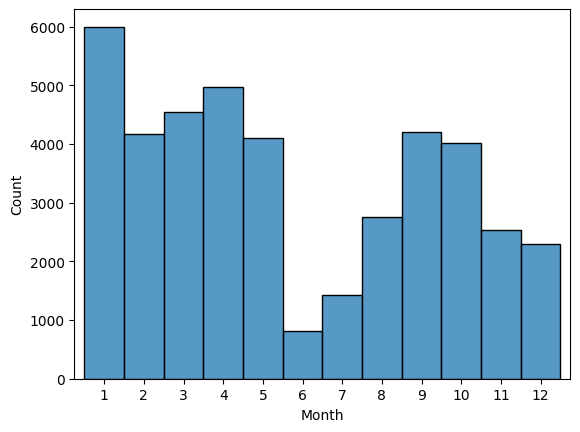

In [13]:
# Histogram
sns.histplot(json_uni, x='Month', bins=12, discrete=True)

plt.xticks(range(1,13))
plt.xlim(0.25, 12.75)

plt.show()

Turns out the mean doesn't shows the indication of normal distribution. Instead the distribution before and post the 50% quartile (`Month=6`) are much more abudant. The more frequency on the first 5-month made the mean more towards below 6 (`mean of Month=5.71`).

<a name="hist-day"></a>
*Day*

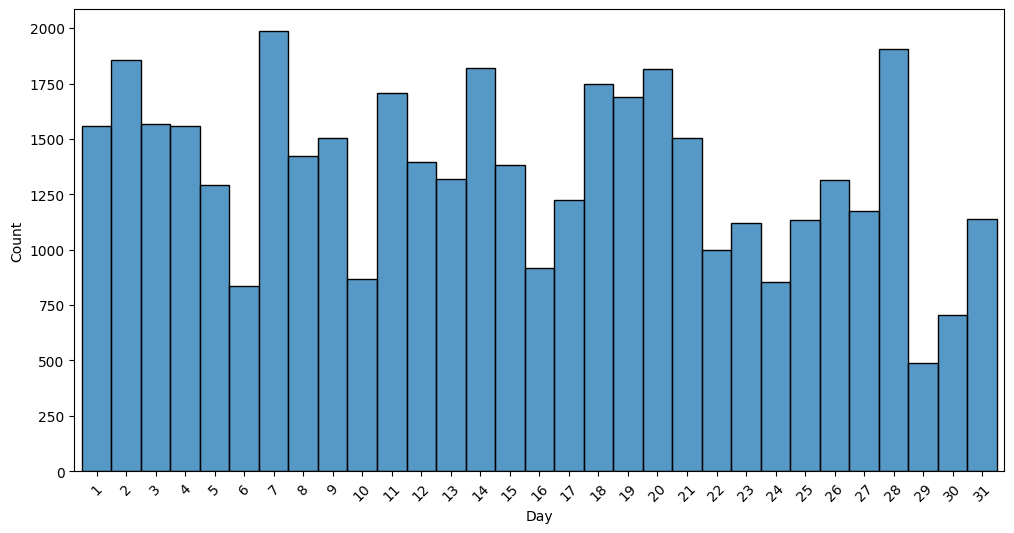

In [14]:
# Histogram
plt.figure(figsize=(12,6))
sns.histplot(json_uni, x='Day', bins=31, discrete=True)

plt.xticks(range(1,32), rotation=45)
plt.xlim(0.25, 31.75) 

plt.show()

It shown the frequency is fluctuate across days, and peaked at `Day=7` and `Day=28`. In contrary, the stream frequency are plumeted at `Day=29` specifically.

<a name="hist-dayweek"></a>
*Day of Week*

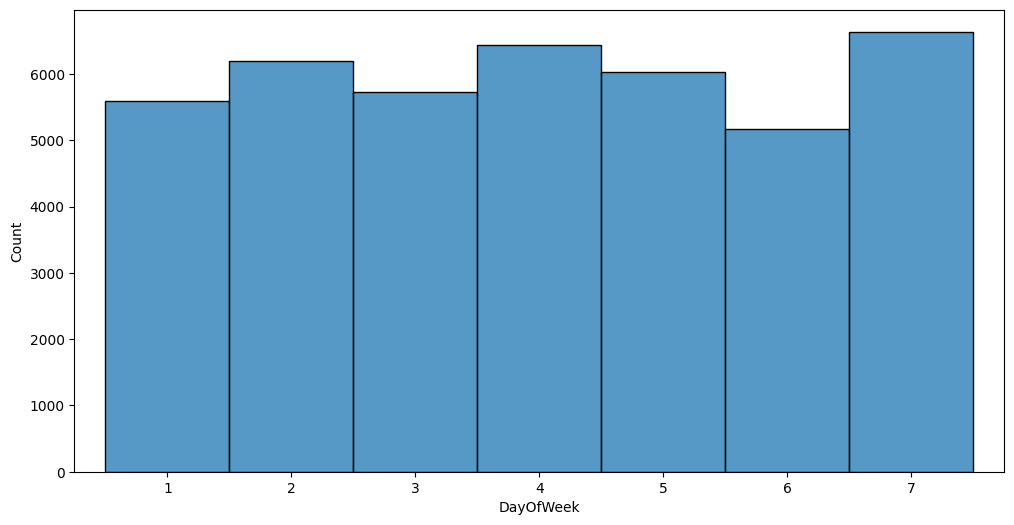

In [15]:
# Histogram
plt.figure(figsize=(12,6))
sns.histplot(json_uni, x='DayOfWeek', bins=7, discrete=True)

plt.xticks(range(1,8))
plt.xlim(0.25, 7.75)

plt.show()

The trend are fluctuate across the days of week, with the peak at `DayofWeek=7` (Sunday) and the lowest at `DayOfWeek=6` (Saturday).  
It shown that Saturday is the least streamed day of the week, possibly due to outdoor activities or social events. While Sunday is the most streamed day, indicating a more relaxed day at home before the start of a new week.

<a name="hist-hour"></a>
*Hour*

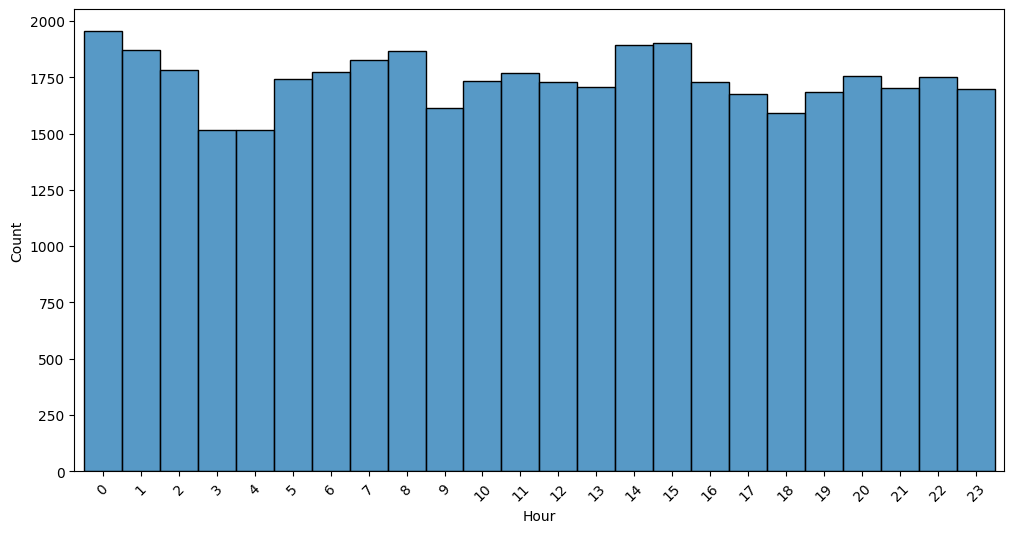

In [16]:
# Histogram
plt.figure(figsize=(12,6))
sns.histplot(json_uni, x='Hour', bins=24, discrete=True)

plt.xticks(range(0,24), rotation=45)
plt.xlim(-0.75, 23.75)

plt.show()

As it also fluctuate across the hour, the streaming peak at `Hour=0`, `Hour=14`, and `Hour=15`. Shown the midnight and evening hours listening behaviour.  
In contrary, `Hour=3` and `Hour=4` are the least streamed time indicating the time of sleeping or auto sleep settings of devices after midnight works/leisure time.

<a name="hist-monthyear"></a>
*Month-Year*

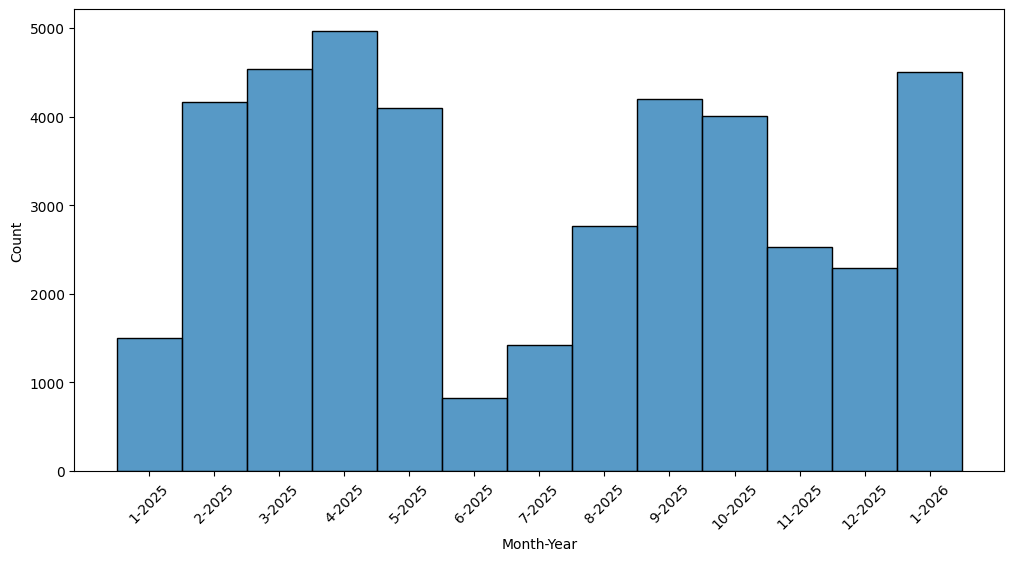

In [17]:
# Histogram
plt.figure(figsize=(12,6))
sns.histplot(json_uni, x='Month-Year', bins=len(json_uni['Month-Year'].unique()), discrete=True)

plt.xticks(rotation=45)

plt.show()

Continuing the previous analysis on [Month distribution](#hist-month), we found several further findings:  
  
*  The most streamed month (`Month=1`) are mainly influenced by the streaming frequency of `Month-Year=1-2026`.
*  `Month-Year=4-2025` become the most streamed month-year, potentially due to the middle of semester which indicate a lot of deep work accompanied with music. The similar peak trend also shown at `Month-Year = 9-2025` which is the middle of semester also.

*Day Month*

In [46]:
json_uni['Day-Month'].value_counts()

Day-Month
2-3      462
14-3     448
12-1     441
7-4      428
20-2     422
        ... 
18-6       1
27-6       1
22-7       1
16-11      1
10-12      1
Name: count, Length: 314, dtype: int64

In [51]:
json_uni[
    json_uni.groupby('Day-Month')['Day-Month'].transform('size') == 1
].value_counts()

endTime              artistName    trackName                          msPlayed  Date        Year  Month  Day  DayOfWeek  Time      Hour  Minute  HourDecimal  Month-Year  Day-Month  Hour-Day
2025-04-24 01:13:00  Zachz Winner  cheemistry                         30412     2025-04-24  2025  4      24   4          01:13:00  1     13      1.216667     4-2025      24-4       1-24        1
2025-04-25 04:38:00  BIBI          Derre                              27723     2025-04-25  2025  4      25   5          04:38:00  4     38      4.633333     4-2025      25-4       4-25        1
2025-06-13 05:38:00  GroovyRoom    This Night (feat. Blue.D, Jhnovr)  99324     2025-06-13  2025  6      13   5          05:38:00  5     38      5.633333     6-2025      13-6       5-13        1
2025-06-18 04:27:00  JENNA SUHL    Pretty Heart                       76586     2025-06-18  2025  6      18   3          04:27:00  4     27      4.450000     6-2025      18-6       4-18        1
2025-06-27 03:01:00  Habitat  

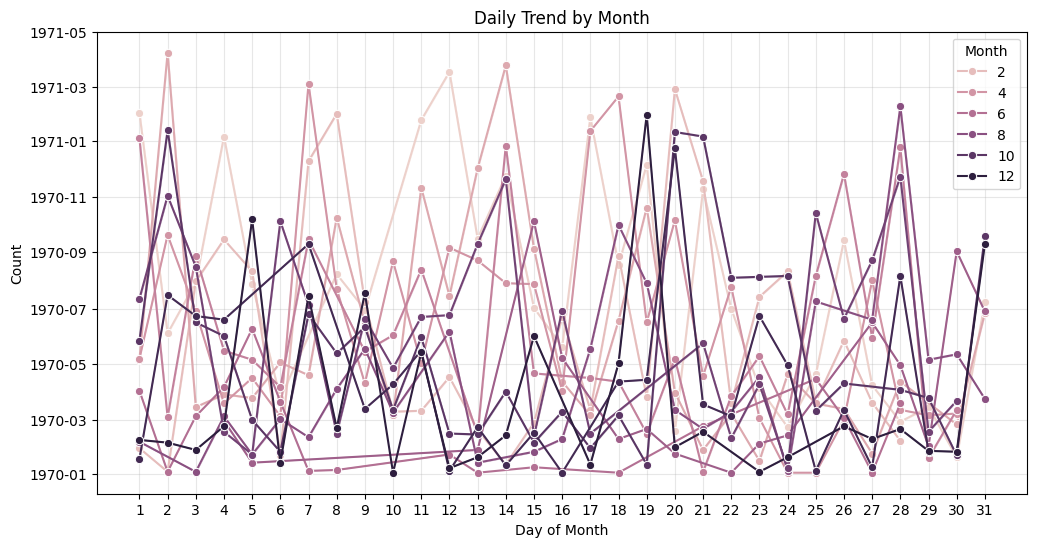

In [42]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=json_uni,
    x="Day",
    y="endTime",
    hue="Month",
    estimator=len,   # 👈 count rows using len()
    marker="o"
)

plt.xticks(range(1, 32))
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.title("Daily Trend by Month")
plt.legend(title="Month")
plt.grid(True, alpha=0.3)
plt.show()

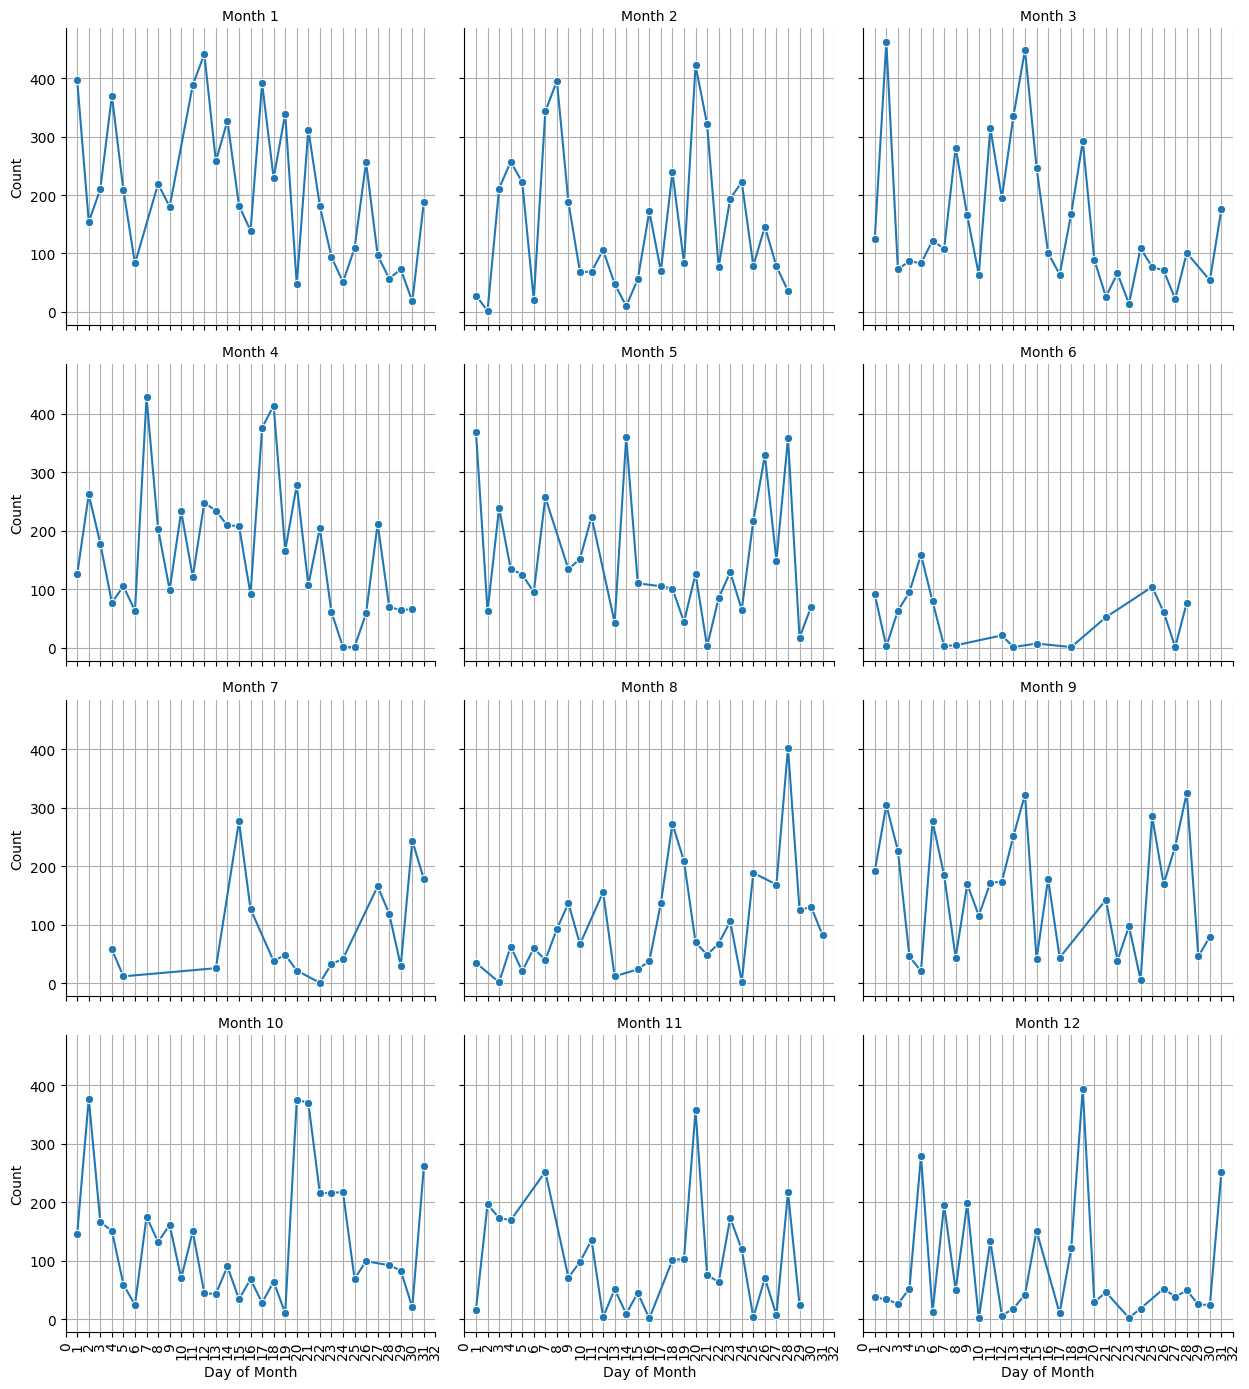

In [41]:
daily_counts = (
    json_uni
    .groupby(['Month', 'Day'])
    .size()
    .reset_index(name='count')
)


g = sns.FacetGrid(
    daily_counts,
    col="Month",
    col_wrap=3,     # 4 columns → 3 rows if 12 months
    height=3.5,     # make each subplot bigger
    aspect=1.2,     # widen a bit
    sharey=True
)

g.map_dataframe(
    sns.lineplot,
    x="Day",
    y="count",
    marker="o"
)

g.set_axis_labels("Day of Month", "Count")
g.set_titles("Month {col_name}")
g.set(xlim=(1, 31))

# Customize ticks: every day, rotated 45 degrees
for ax in g.axes.flatten():
    ax.set_xticks(range(0, 33))
    ax.set_xticklabels(range(0, 33), rotation=90)
    ax.grid(True)

plt.tight_layout()
plt.show()


*Hour Month*